In [1]:
# MO444-A 2s/2017 - Third assignment
#
#         Group 05
#
# - Anderson Rossanez (124136)
# - Bruno Branta Lopes (31470)
#

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import scale

def loadIDs():
    lines=[]
    with open('documents/ids', "r") as f:
        lines = f.read().splitlines()
    return np.asarray(lines)

def loadFeatures():
    features = pd.read_csv('documents/data.csv', sep=',', header=None)
    return features.values
    

In [2]:
ids = loadIDs()
print('IDs shape: {}'.format(ids.shape))

data = loadFeatures()
print('Data shape: {}'.format(data.shape))

IDs shape: (19924,)
Data shape: (19924, 2209)


In [3]:
# Let's look at the 5 first instances of the IDs
print(ids[0:5])

['832e15531654188fa0b951faa5f68540dfb1ca5a'
 'aa5163928a6edfd3bf69fd11fe763aacecf4602d'
 'e886703afff0c70d6598bcae0c2d69a5a237807f'
 'c1ea507b177b2e1673ce7a576057f91b75ae9d29'
 'bbf73405c85d22702fafc1c0916e8f713810ff8d']


In [4]:
# Now, let's have a look at the 5 first instances of the data (bag-of-words feature vectors)
data_frame = pd.DataFrame(data)
data_frame.head(5)

,0,1,2,3,4,5,6,7,8,9,...,2199,2200,2201,2202,2203,2204,2205,2206,2207,2208
0,0.077257,0,0,0,0.000000,0.000000,0,0,0,0,...,0.000000,0,0.000000,0,0,0,0,0.000000,0,0
1,0.000000,0,0,0,0.000000,0.000000,0,0,0,0,...,0.000000,0,0.000000,0,0,0,0,0.055755,0,0
2,0.042250,0,0,0,0.000000,0.000000,0,0,0,0,...,0.093693,0,0.099296,0,0,0,0,0.000000,0,0
3,0.000000,0,0,0,0.069105,0.000000,0,0,0,0,...,0.000000,0,0.000000,0,0,0,0,0.036811,0,0
4,0.000000,0,0,0,0.000000,0.041917,0,0,0,0,...,0.000000,0,0.000000,0,0,0,0,0.000000,0,0


In [5]:
# Checking the value ranges
print('Min. value: {}'.format(np.min(data.flatten())))
print('Max. value: {}'.format(np.max(data.flatten())))

# Let's scale and normalize the data
data = scale(data)

normalizer = Normalizer()
normalizer = normalizer.fit(data)

data = normalizer.transform(data)

Min. value: 0.0
Max. value: 0.999901


In [9]:
# Attempting Mini-Batch K means with some different number of centroids.
num_centroids = xrange(2, 100)
kmeans = [MiniBatchKMeans(n_clusters=i, init='k-means++', batch_size=1000, random_state=1) for i in num_centroids]

start_time = datetime.now()
costs, labels = [], []
for i in range(len(kmeans)):
    labels.append(kmeans[i].fit_predict(data))
    costs.append(kmeans[i].inertia_)

print('Elapsed time: {}'.format(datetime.now() - start_time))

Elapsed time: 0:39:47.342075


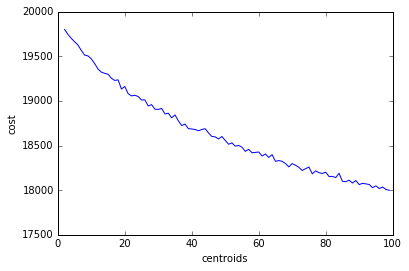

In [10]:
# Plot an elbow curve.
plt.plot(num_centroids, costs, color='blue')
plt.xlabel('centroids')
plt.ylabel('cost')
plt.show()

In [11]:
# Check the silhouette scores around the elbow.
start_time = datetime.now()
for i in range(95, 100):
    sil_avg = silhouette_score(data, labels[i-2])
    print('centroids: %d, silhouette average: %f' % (kmeans[i-2].n_clusters, sil_avg))

print('Elapsed time: {}'.format(datetime.now() - start_time))

centroids: 95, silhouette average: 0.022405
centroids: 96, silhouette average: 0.022595
centroids: 97, silhouette average: 0.021322
centroids: 98, silhouette average: 0.022454
centroids: 99, silhouette average: 0.022056
Elapsed time: 0:41:54.540157
